In [0]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV
import statsmodels.api as sm
import statsmodels.formula.api as smf

**Reading the dataset from the file**

In [0]:
data = pd.read_csv('wdbc.data')
col = data.columns
y = data.diagnosis
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )

#**Running the Random Forest Classifier on all of the data (all features)**

Accuracy is: 97.08%


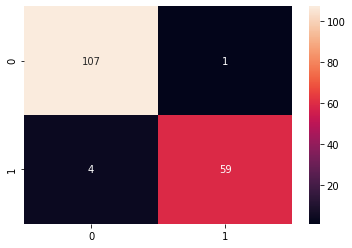

In [41]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

rfc = RandomForestClassifier(random_state=42)      
rfc = rfc.fit(x_train,y_train)

ac = accuracy_score(y_test,rfc.predict(x_test))
print('Accuracy is: {:.2%}'.format(ac))
confusion_diag = confusion_matrix(y_test,rfc.predict(x_test))
sns.heatmap(confusion_diag,annot=True,fmt="d")

**Generating a Correlation map using all the features to understand which features are highly co-related.**

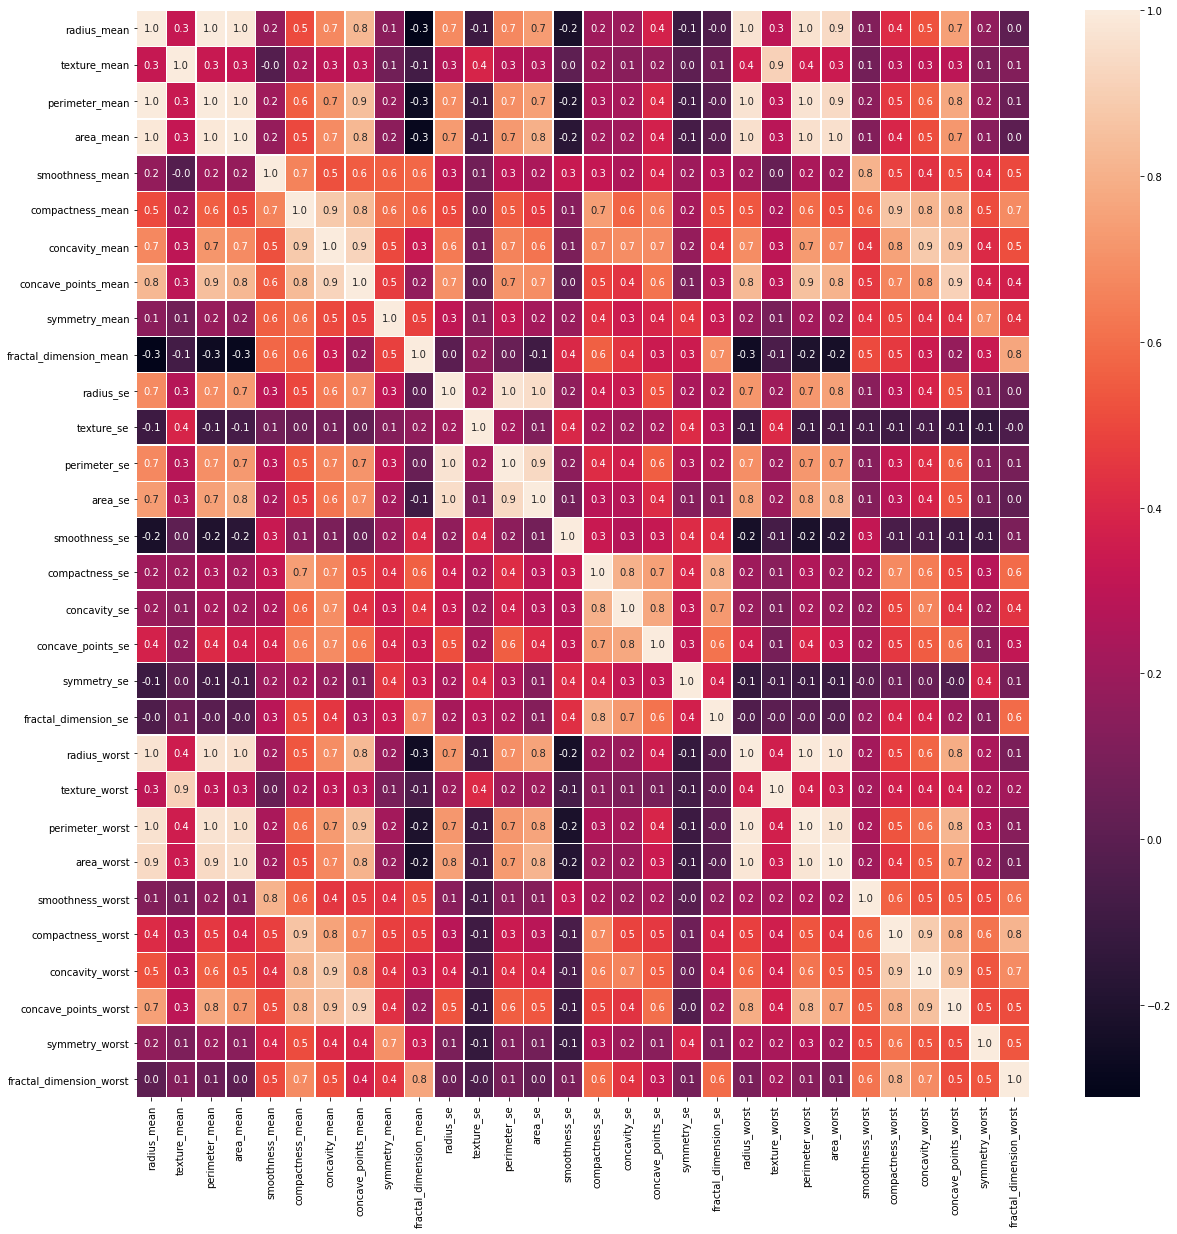

In [42]:
figure,axis = plt.subplots(figsize=(20, 20))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=axis)


**Feature selection and random forest classification is done by selecting the top 5 best features in the dataset.**

In [43]:
ranked_features = SelectKBest(chi2, k=5).fit(x_train, y_train)
num = 0
scores = ranked_features.scores_
features = x_train.columns
for num in range(len(scores)):
  print("Feature:\t{0}\t\tScore:\t{1}".format(features[num],scores[num]))
print("\n")
x_train.shape

Feature:	radius_mean		Score:	177.9464917167814
Feature:	texture_mean		Score:	60.69164330517177
Feature:	perimeter_mean		Score:	1340.6109240193405
Feature:	area_mean		Score:	36689.95565960421
Feature:	smoothness_mean		Score:	0.1000151750331587
Feature:	compactness_mean		Score:	3.4183949321342344
Feature:	concavity_mean		Score:	13.054764972745545
Feature:	concave_points_mean		Score:	7.097664570092185
Feature:	symmetry_mean		Score:	0.19598284728847676
Feature:	fractal_dimension_mean		Score:	0.0003425750717589389
Feature:	radius_se		Score:	24.588296655397116
Feature:	texture_se		Score:	0.040713102622251376
Feature:	perimeter_se		Score:	172.6968399888139
Feature:	area_se		Score:	6127.410670385935
Feature:	smoothness_se		Score:	0.0013247037199600256
Feature:	compactness_se		Score:	0.374071521123189
Feature:	concavity_se		Score:	0.6928967190877815
Feature:	concave_points_se		Score:	0.20158719379732262
Feature:	symmetry_se		Score:	0.0013955780572281451
Feature:	fractal_dimension_se		Score:	0.0

(398, 30)

**Using the infomartion generated earlier, we use the 5 best features to modify the training test and run the Random Forest Classifier Again.**

Accuracy is: 97.0760%


(398, 30)

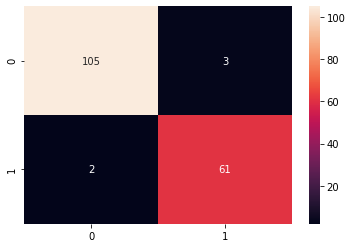

In [44]:
x_train_top5 = ranked_features.transform(x_train)
x_test_top5 = ranked_features.transform(x_test)
rfc = RandomForestClassifier()      
rfc = rfc.fit(x_train_top5,y_train)
accuracy = accuracy_score(y_test,rfc.predict(x_test_top5))
print('Accuracy is: {:.4%}'.format(accuracy))
confusion_diag = confusion_matrix(y_test,rfc.predict(x_test_top5))
sns.heatmap(confusion_diag,annot=True,fmt="d")


x_train.shape

**Recursive Feature Elimination with Random Forest Classifier. Based on the optimal features another iteration of RFC is run.**


5 Best Features by Recursive Feature Elminitaion: 
concave_points_mean	
radius_worst	
perimeter_worst	
area_worst	
concave_points_worst	

Accuracy is: 97.0760%








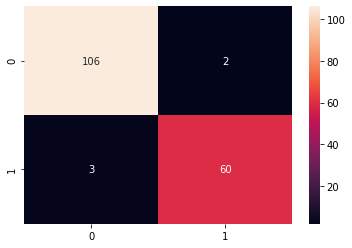

In [45]:
# Create the RFE object and rank each pixel
rfc = RandomForestClassifier()      
rfe = RFE(estimator=rfc, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)
l1 = x_train.columns[rfe.support_]
num = 0
print("5 Best Features by Recursive Feature Elminitaion: ")
for num in range(len(l1)):
  print("{0}\t".format(l1[num]))

rfc = RandomForestClassifier() 
rfecv = RFECV(estimator=rfc, step=1, cv=5,scoring='accuracy')
rfecv = rfecv.fit(x_train, y_train)
accuracy = accuracy_score(y_test,rfecv.predict(x_test))
print('\nAccuracy is: {:.4%}'.format(accuracy))

print("\n")
# print('Optimal number of features :', rfecv.n_features_)
print("\n")
l1 = x_train.columns[rfecv.support_]
# num = 0
# print("Best Features: ")
# for num in range(len(l1)):
#   print("\t{0}\t".format(l1[num]))

print('\n')
cm = confusion_matrix(y_test,rfecv.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

#**Logistic Regression run using the 5 best features found earlier**

In [46]:
# re-read the data - to ensure clean dropping of features
data = pd.read_csv("wdbc.data")
data = data.drop('Unnamed: 32', axis=1)
x = data
y = data['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

# dropping all features except the most important features that came up earlier!

drop_list = ['diagnosis', 'id', 'radius_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concave_points_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
       
cols = data.columns.drop(drop_list)
formula = 'diagnosis ~ ' + ' + '.join(cols)
print(formula, '\n')

diagnosis ~ texture_mean + concave_points_mean + concavity_se + symmetry_se + area_worst 



In [47]:
#Running the logistic model now gives : Perfect separation detected, results not available
# dropping more features like done in the Random Forest Method
model = smf.glm(formula=formula, data=x_train, family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                        Generalized Linear Model Regression Results                         
Dep. Variable:     ['diagnosis[B]', 'diagnosis[M]']   No. Observations:                  284
Model:                                          GLM   Df Residuals:                      278
Model Family:                              Binomial   Df Model:                            5
Link Function:                                logit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:                -37.644
Date:                              Wed, 29 Apr 2020   Deviance:                       75.288
Time:                                      14:34:12   Pearson chi2:                     110.
No. Iterations:                                   9                                         
Covariance Type:                          nonrobust                                         
                          coef    std err          z      P>|z|      [

**Print the accuracy and the confusion matrix for the prediction**

              precision    recall  f1-score   support

           B      0.984     0.963     0.973       187
           M      0.931     0.969     0.950        98

    accuracy                          0.965       285
   macro avg      0.957     0.966     0.961       285
weighted avg      0.966     0.965     0.965       285

Correct Predictions 96.5 %


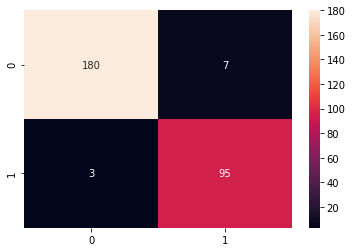

In [48]:
print(classification_report(y_test, predictions_nominal, digits=3))

confu_matr = confusion_matrix(y_test, predictions_nominal)
sns.heatmap(confu_matr,annot=True,fmt="d")

true_negative = confu_matr[0][0]
false_positive = confu_matr[0][1]
false_negative = confu_matr[1][0]
true_positive = confu_matr[1][1]
print('Correct Predictions', 
      round((true_negative + true_positive) / len(predictions_nominal) * 100, 1), '%')